In [7]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
import rdkit.Chem.AllChem as AllChem
from rdkit.Chem.Draw import rdMolDraw2D
IPythonConsole.drawOptions.addAtomIndices = False
IPythonConsole.molSize = 800, 800
IPythonConsole.ipython_useSVG=True  #< set this to False if you want PNGs instead of SVGs

In [28]:
molecule = Chem.AddHs(Chem.MolFromSmiles("CC1=C(C=C(C=C1)NC(=O)C2=CC=C(C=C2)CN3CCN(CC3)C)NC4=NC=CC(=N4)C5=CN=CC=C5"))

In [23]:
AllChem.ComputeGasteigerCharges(molecule)

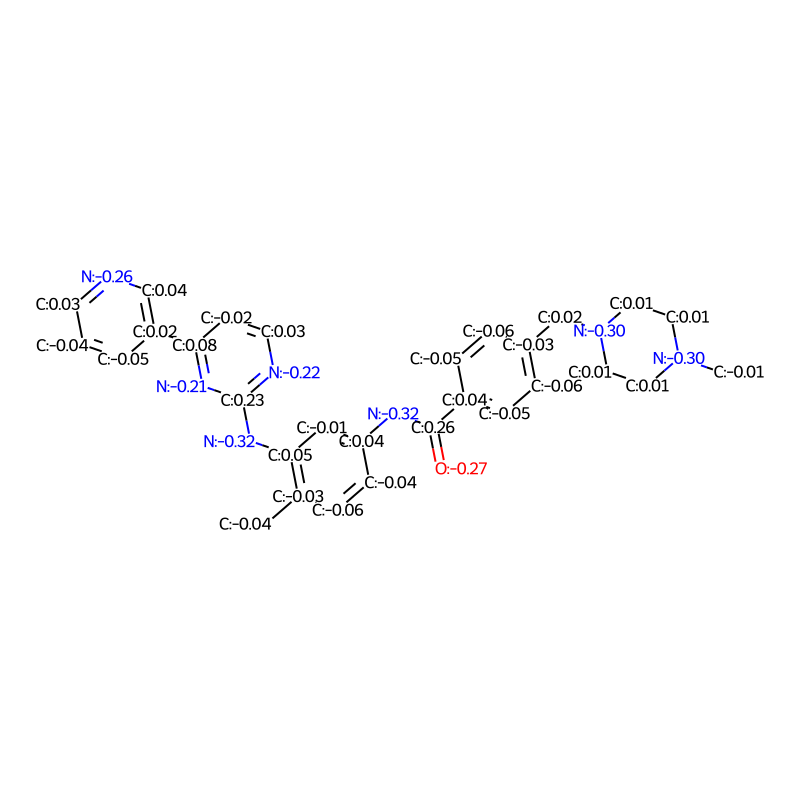

In [24]:
m2 = Chem.Mol(molecule)
for at in m2.GetAtoms():
    lbl = '%s:%.2f'%(at.GetSymbol(),at.GetDoubleProp("_GasteigerCharge"))
    at.SetProp('atomLabel',lbl)
m2

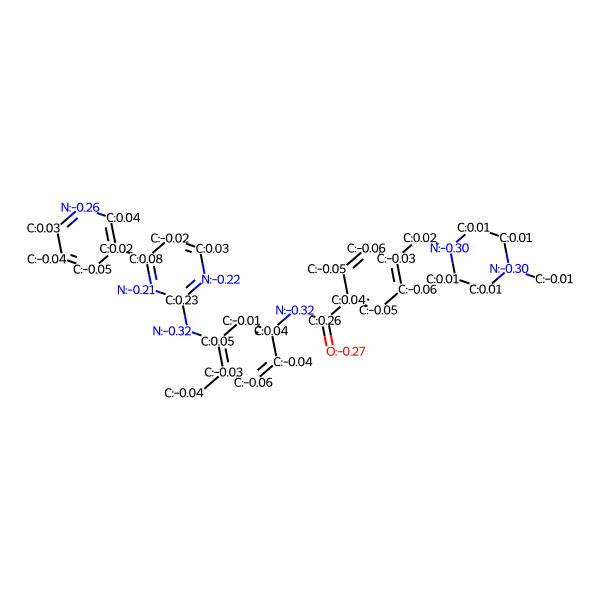

In [25]:
d2d = rdMolDraw2D.MolDraw2DSVG(600,600)
# the labels end up being a bit big. It helps to scale them down
d2d.SetFontSize(6)
dm = rdMolDraw2D.PrepareMolForDrawing(m)
dopts = d2d.drawOptions()
for i,at in enumerate(m.GetAtoms()):
    dopts.atomLabels[i] = '%s:%.2f'%(at.GetSymbol(),at.GetDoubleProp("_GasteigerCharge"))
d2d.DrawMolecule(dm)
d2d.FinishDrawing()
svg = d2d.GetDrawingText()
from IPython.display import SVG
SVG(svg)

In [3]:
import collections
from collections import Counter
from pathlib import Path
import operator
import time
import math

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets, cluster

from rdkit import RDConfig, Chem, Geometry, DistanceGeometry
from rdkit.Chem import (
    ChemicalFeatures,
    rdDistGeom,
    Draw,
    rdMolTransforms,
    AllChem,
)
from rdkit.Chem.Draw import DrawingOptions
from rdkit.Chem.Pharm3D import Pharmacophore, EmbedLib
from rdkit.Numerics import rdAlignment
import nglview as nv

/Users/todd/opt/anaconda3/envs/rdkit_env/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [30]:
# We need to add hydrogens to the ligand skeleton and create an embedded molecule instance.
AllChem.EmbedMolecule(molecule)
view = nv.show_rdkit(molecule)
view

NGLWidget()

In [18]:

view = nv.show_pdbid("3pqr")  # load "3pqr" from RCSB PDB and display viewer widget
view

NGLWidget()